In [1]:
import sys 
sys.path.append("../")

In [2]:
from mps_utils import * 
from wave_circuit import * 
import matplotlib.pyplot as plt 

In [3]:
f1 = lambda x :  np.exp(-(x-0.45)**2/0.01)
df1 = lambda x: ( -2 * (x-0.45)/(0.01) ) * f1(x)

f2 = lambda x :  (x-0.45)/0.05 * f1(x)
df2 = lambda x: (x-0.45)/0.05 * df1(x) + 1/0.05 * f1(x)

f3 = lambda x: (1-(x-0.45)**2/0.01) * f1(x)
df3 = lambda x: -2*(x-0.45)/0.01 * f1(x) + (1-(x-0.45)**2/0.01)*df1(x)

m = 5
l = 2**m
x_coarse = np.linspace(0,1,l+1)

C:\Users\bik19\AppData\Local\Temp\ipykernel_6520\3241995389.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis", time_steps)


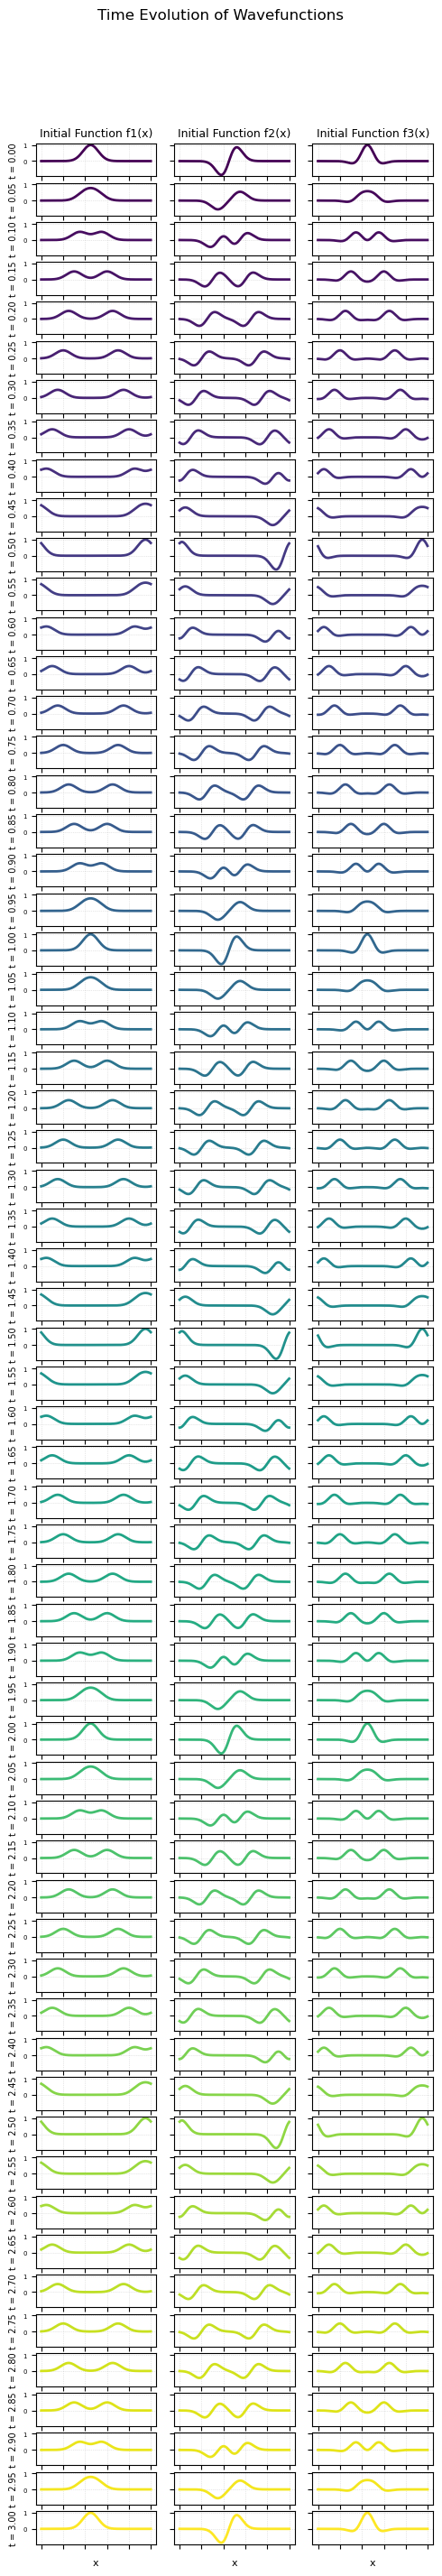

In [ ]:
from scipy.linalg import expm 
from matplotlib import cm


n = 9
N = 2**n
x = np.linspace(0, 1 - 1/N, N)

exact_Hamiltonian = Ham_P(N)
time_steps = 61
dt = 0.05

# Reduce figure size for a more compact layout
fig, ax = plt.subplots(time_steps, 3, figsize=(5, 30), sharex=True, sharey=True)
fig.suptitle("Time Evolution of Wavefunctions", fontsize=12,y=0.95)

functions = [f1, f2, f3]
titles = ['Initial Function f1(x)', 'Initial Function f2(x)', 'Initial Function f3(x)']

# Use a colormap to emphasize time evolution
cmap = cm.get_cmap("viridis", time_steps)
colors = [cmap(i) for i in range(time_steps)]

for col in range(3):
    func = functions[col]
    initial_state = np.concatenate([func(x), np.zeros(x.shape)])
    
    for row in range(time_steps):
        t = row * dt
        evolved_state = expm(-1j * exact_Hamiltonian * t) @ initial_state
        ax[row][col].plot(x, evolved_state[:len(x)].real, color=colors[row], linewidth=2)

        # Label time on left-most column
        if col == 0:
            ax[row][col].set_ylabel(f"t = {t:.2f}", fontsize=7)
        
        # Set titles on top row
        if row == 0:
            ax[row][col].set_title(titles[col], fontsize=9)

        ax[row][col].tick_params(labelsize=5)  # Smaller tick labels
        ax[row][col].grid(True, linestyle=':', linewidth=0.5, alpha=0.6)

# Hide x-axis labels on all but last row
for row in range(time_steps - 1):
    for col in range(3):
        ax[row][col].set_xticklabels([])

# Set a common x-axis label
for col in range(3):
    ax[-1][col].set_xlabel("x", fontsize=8)

# Adjust layout to reduce space
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, top=0.9)  # Reduced hspace for a more compact layout
plt.savefig("../Figures/ExactEvolutionPer.pdf",dpi=300)
plt.show()

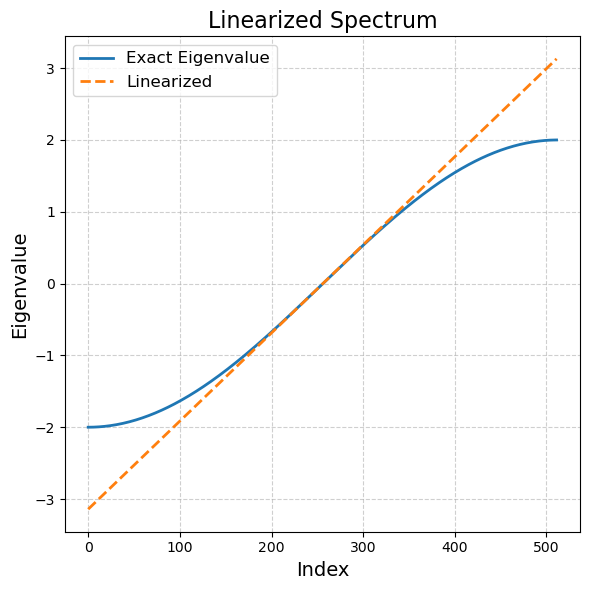

In [ ]:
plt.figure(figsize=(6, 6))

plt.plot(np.sqrt(-spectrum_P(N))*np.sign(linear_spectrum_P(N)), label='Exact Eigenvalue', linewidth=2, color='tab:blue')
plt.plot(linear_spectrum_P(N), label='Linearized', linewidth=2, linestyle='--', color='tab:orange')

plt.title('Linearized Spectrum', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('../Figures/PerEigenvalues.pdf',dpi=300)
plt.show()

C:\Users\bik19\AppData\Local\Temp\ipykernel_6520\181969439.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis", time_steps)
C:\Users\bik19\AppData\Local\Temp\ipykernel_6520\181969439.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap("cool", time_steps)


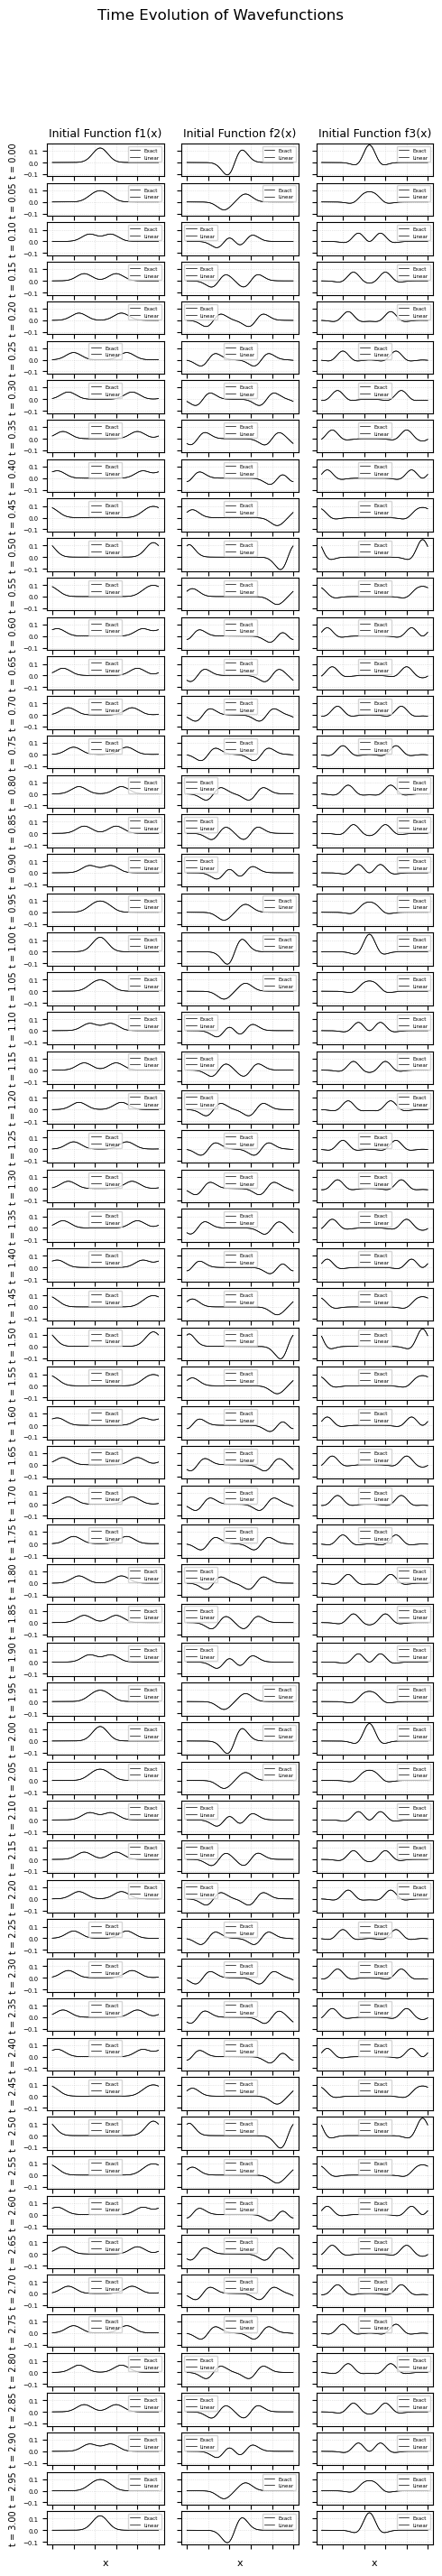

In [6]:

exact_Hamiltonian = Ham_P(N)
linear_Hamiltonian = linear_Ham_P(N)
time_steps = 61
dt = 0.05

exact_data = np.zeros((time_steps,3,2*len(x)),dtype=complex)
linear_data = np.zeros((time_steps,3,2*len(x)),dtype=complex)
# Reduce figure size for a more compact layout
fig, ax = plt.subplots(time_steps, 3, figsize=(5, 30), sharex=True, sharey=True)
fig.suptitle("Time Evolution of Wavefunctions", fontsize=12,y=0.95)

functions = [f1, f2, f3]
titles = ['Initial Function f1(x)', 'Initial Function f2(x)', 'Initial Function f3(x)']

# Use a colormap to emphasize time evolution
cmap = cm.get_cmap("viridis", time_steps)
colors = [cmap(i) for i in range(time_steps)]

cmap1 = cm.get_cmap("cool", time_steps)
colors1 = [cmap1(i) for i in range(time_steps)]

for col in range(3):
    func = functions[col]
    initial_state = np.concatenate([func(x)/np.linalg.norm(func(x)), np.zeros(x.shape)])
    
    for row in range(time_steps):
        t = row * dt
        evolved_state = expm(-1j * exact_Hamiltonian * t) @ initial_state
        linear_state = expm(-1j * linear_Hamiltonian * t) @ initial_state

        ax[row][col].plot(x, evolved_state[:len(x)].real,color='k',linewidth=0.5,label='Exact')
        ax[row][col].plot(x, linear_state[:len(x)].real,color='k',linewidth=0.5,label='Linear')
        ax[row][col].legend(fontsize=4)
        
        exact_data[row,col,:] = evolved_state
        linear_data[row,col,:] = linear_state

        
        # Label time on left-most column
        if col == 0:
            ax[row][col].set_ylabel(f"t = {t:.2f}", fontsize=7)
        
        # Set titles on top row
        if row == 0:
            ax[row][col].set_title(titles[col], fontsize=9)

        ax[row][col].tick_params(labelsize=5)  # Smaller tick labels
        ax[row][col].grid(True, linestyle=':', linewidth=0.5, alpha=0.6)

# Hide x-axis labels on all but last row
for row in range(time_steps - 1):
    for col in range(3):
        ax[row][col].set_xticklabels([])

# Set a common x-axis label
for col in range(3):
    ax[-1][col].set_xlabel("x", fontsize=8)

# Adjust layout to reduce space
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, top=0.9)  # Reduced hspace for a more compact layout
plt.show()

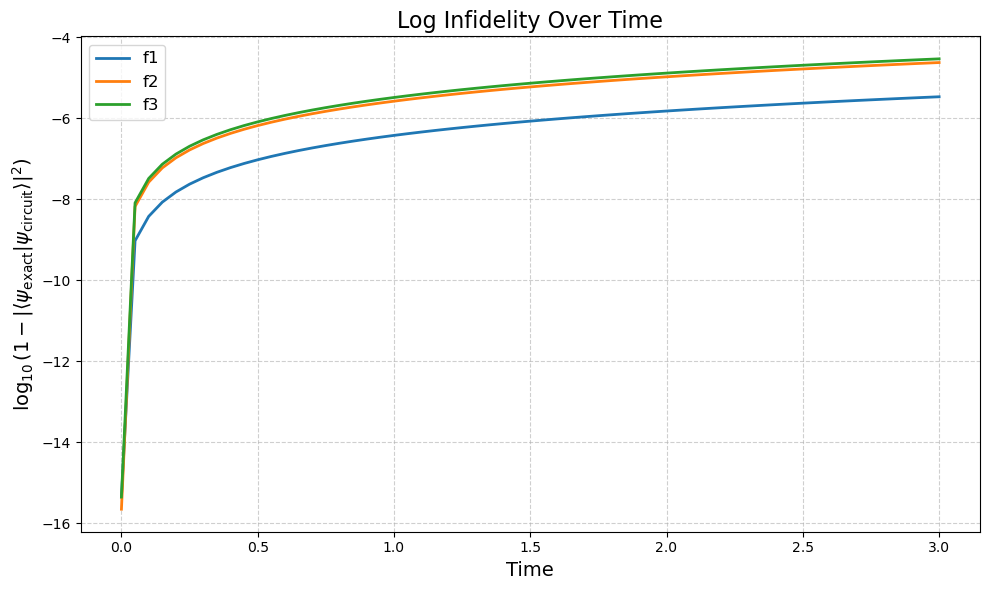

In [ ]:

time = np.array(range(time_steps)) * dt
log_infidelities = [
    [np.log10(1 - abs(linear_data[t, i, :].conjugate() @ exact_data[t, i, :])**2) for t in range(time_steps)]
    for i in range(3)
]

plt.figure(figsize=(10, 6))

colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['f1', 'f2', 'f3']

for i in range(3):
    plt.plot(time, log_infidelities[i], label=labels[i], color=colors[i], linewidth=2)

plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\log_{10}(1 - |\langle \psi_{\mathrm{exact}} | \psi_{\mathrm{circuit}} \rangle|^2)$', fontsize=14)
plt.title('Log Infidelity Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("../Figures/LinearExactInfidelityPlotPer.pdf",dpi=300)
plt.show()

In [8]:
infid1 = []
infid2 = []
infid3 = []

for n in tqdm(range(5,11)):
    N = 2**n
    x = np.linspace(0, 1 - 1/N, N)
    
    exact_Hamiltonian = Ham_P(N)
    linear_Hamiltonian = linear_Ham_P(N)

    initial_states = [np.concatenate([func(x)/np.linalg.norm(func(x)), np.zeros(x.shape)]) for func in [f1,f2,f3]]


    evolved_state = [expm(-1j * exact_Hamiltonian * 3) @ state for state in  initial_states]
    linear_state = [expm(-1j * linear_Hamiltonian * 3) @ state for state in  initial_states]
    
    infid1.append(1 - abs(evolved_state[0]  @ linear_state[0])**2)
    infid2.append(1 - abs(evolved_state[1]  @ linear_state[1])**2)
    infid3.append(1 - abs(evolved_state[2]  @ linear_state[2])**2)
    

  0%|          | 0/6 [00:00<?, ?it/s]

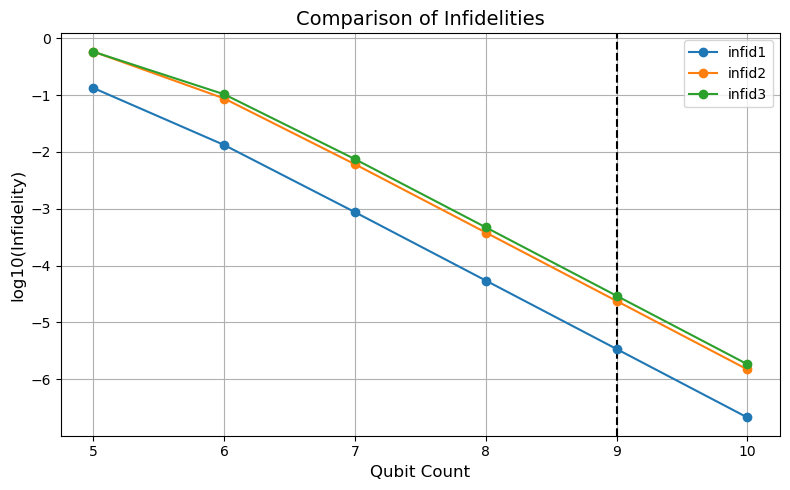

In [ ]:

plt.figure(figsize=(8, 5))
plt.axvline(x=9,color='k',linestyle='--')

plt.plot(range(5, 11), np.log10(infid1), marker='o', linestyle='-', label='infid1')
plt.plot(range(5, 11), np.log10(infid2), marker='o', linestyle='-', label='infid2')
plt.plot(range(5, 11), np.log10(infid3), marker='o', linestyle='-', label='infid3')

plt.xlabel('Qubit Count', fontsize=12)
plt.ylabel('log10(Infidelity)', fontsize=12)
plt.title('Comparison of Infidelities', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../Figures/LinearizedInfidelityQubitsPer.pdf")
plt.show()

In [26]:
from qiskit.quantum_info import Statevector 
from qiskit.circuit import Parameter 

n = 9
N = 2**n
x = np.linspace(0, 1 - 1/N, N)

circuit_data = np.zeros((time_steps,3,2*len(x)),dtype=complex)

for col in range(3):
    func = functions[col]
    initial_state = np.concatenate([func(x)/np.linalg.norm(func(x)), np.zeros(x.shape)])
    initial_state_vector = Statevector(initial_state)
    
    t = Parameter('t')
    circ = QuantumCircuit(n+1)
    state_circ = QuantumCircuit(n+1)
    state_circ.prepare_state(initial_state_vector)
    circ = circ.compose(state_circ.reverse_bits(),range(0,n+1))
    circ =circ.compose(evolve_circ_P(n,t),range(0,n+1))

    for row in range(time_steps):
        t = row * dt
        circuit_data[row,col,:] = Statevector(circ.assign_parameters([t]).reverse_bits()).data[:2*len(x)]

In [27]:
circ_infidelities = [
    [(1-abs(linear_data[t, i, :].conjugate() @ circuit_data[t, i, :])**2) for t in range(time_steps)]
    for i in range(3)
]
np.min(circ_infidelities),np.max(circ_infidelities)

(np.float64(-4.0323300254385686e-12), np.float64(1.4641621248756564e-12))

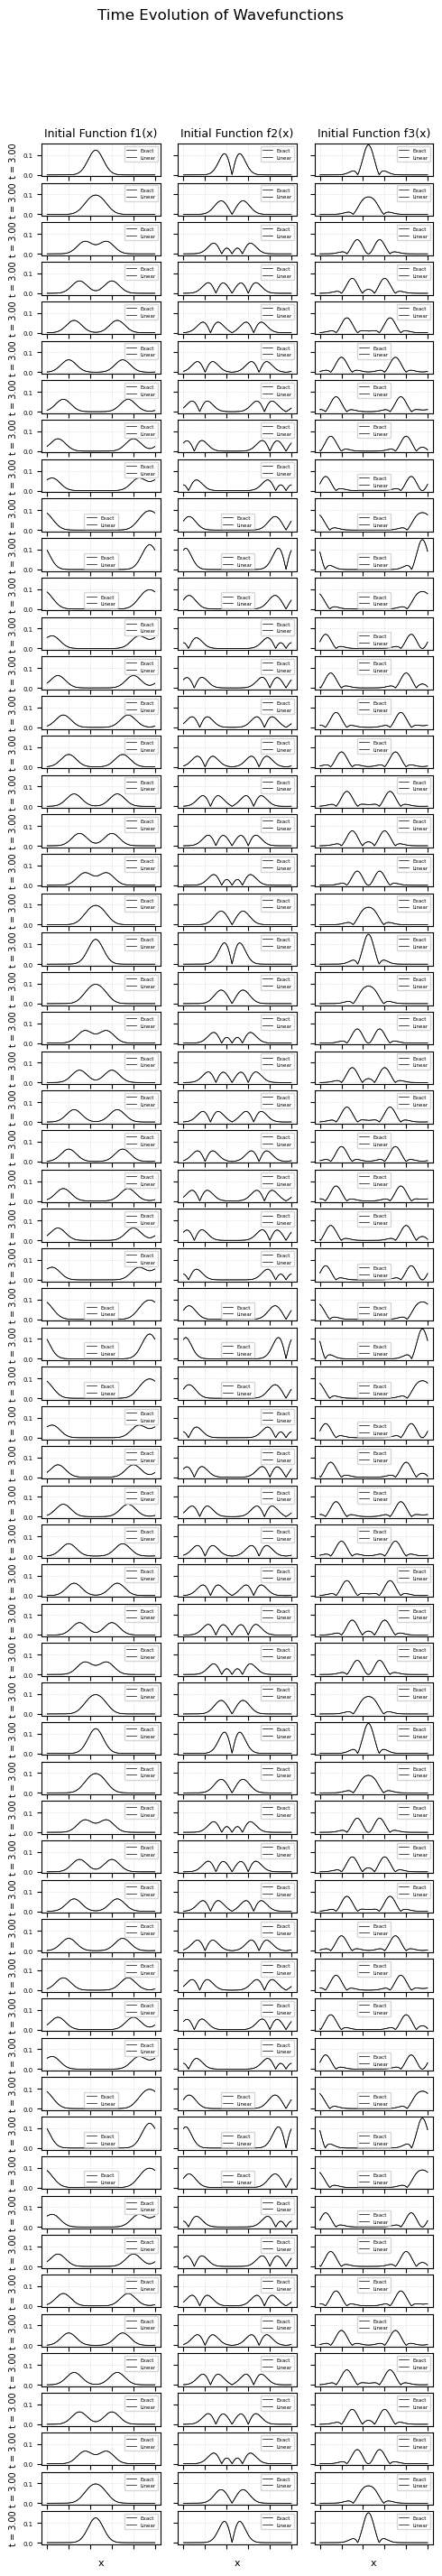

In [28]:
fig, ax = plt.subplots(time_steps, 3, figsize=(5, 30), sharex=True, sharey=True)
fig.suptitle("Time Evolution of Wavefunctions", fontsize=12,y=0.95)


for col in range(3):
    
    for row in range(time_steps):
        ax[row][col].plot(x, abs(exact_data[row,col,:][:len(x)]),color='k',linewidth=0.5,label='Exact')
        ax[row][col].plot(x, abs(circuit_data[row,col,:][:len(x)]),color='k',linewidth=0.5,label='Linear')
        ax[row][col].legend(fontsize=4)

        
        # Label time on left-most column
        if col == 0:
            ax[row][col].set_ylabel(f"t = {t:.2f}", fontsize=7)
        
        # Set titles on top row
        if row == 0:
            ax[row][col].set_title(titles[col], fontsize=9)

        ax[row][col].tick_params(labelsize=5)  # Smaller tick labels
        ax[row][col].grid(True, linestyle=':', linewidth=0.5, alpha=0.6)

# Hide x-axis labels on all but last row
for row in range(time_steps - 1):
    for col in range(3):
        ax[row][col].set_xticklabels([])

# Set a common x-axis label
for col in range(3):
    ax[-1][col].set_xlabel("x", fontsize=8)

# Adjust layout to reduce space
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, top=0.9)  # Reduced hspace for a more compact layout
plt.savefig("../Figures/ExactCircuitEvolution.pdf",dpi=300)
plt.show()

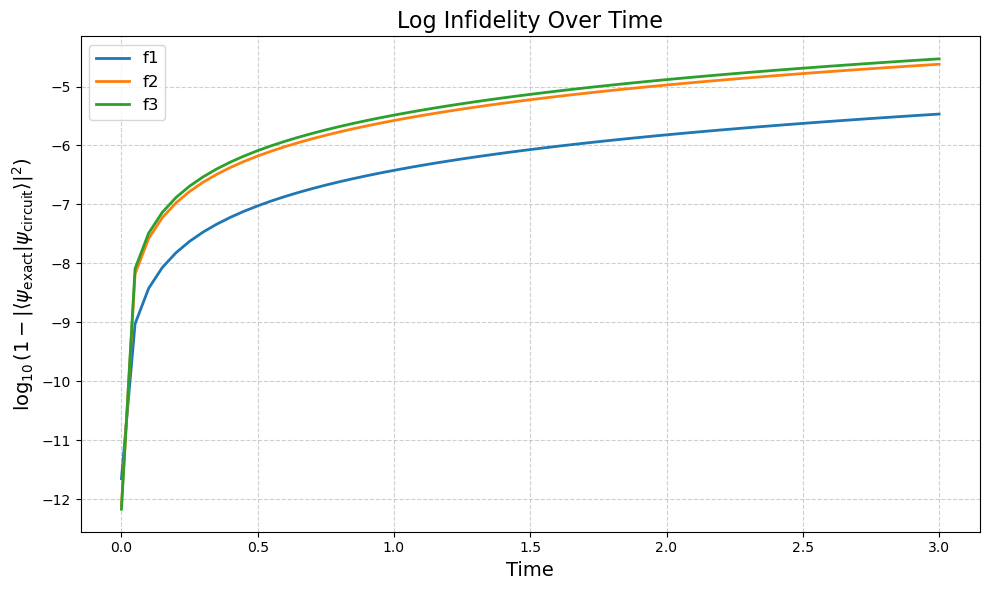

In [ ]:

time = np.array(range(time_steps)) * dt
log_infidelities = [
    [np.log10(abs(1 - abs(circuit_data[t, i, :].conjugate() @ exact_data[t, i, :])**2)) for t in range(time_steps)]
    for i in range(3)
]

plt.figure(figsize=(10, 6))

colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['f1', 'f2', 'f3']

for i in range(3):
    plt.plot(time, log_infidelities[i], label=labels[i], color=colors[i], linewidth=2)

plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\log_{10}(1 - |\langle \psi_{\mathrm{exact}} | \psi_{\mathrm{circuit}} \rangle|^2)$', fontsize=14)
plt.title('Log Infidelity Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("../Figures/LinearInfidelityTimePlotPer.pdf",dpi=300)
plt.show()

In [30]:
depth_list =[]
for n in range(5,20):
    qc = evolve_circ(n,1)
    depth_list.append(qc.depth())

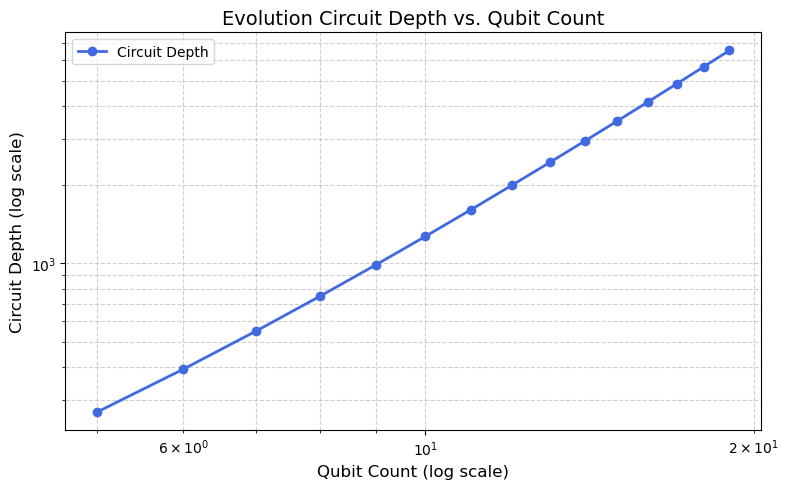

In [ ]:

x = range(5, 20)
y = depth_list  # Make sure this is defined

plt.figure(figsize=(8, 5))  # Set figure size

plt.plot(x, y, marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=6, label='Circuit Depth')

# Set log-log scale
plt.xscale('log')
plt.yscale('log')

# Add grid
plt.grid(True, which='both', linestyle='--', alpha=0.6)

# Labels and title
plt.xlabel('Qubit Count (log scale)', fontsize=12)
plt.ylabel('Circuit Depth (log scale)', fontsize=12)
plt.title('Evolution Circuit Depth vs. Qubit Count', fontsize=14)

# Add legend
plt.legend()

# Improve layout
plt.tight_layout()
plt.savefig("../Figures/DepthDataPer.pdf",dpi=300)
plt.show()